In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fd = pd.read_csv('FlightDelays.csv')

In [3]:
fd.shape
fd.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime


In [4]:
fd.columns = ['Scheduled_Departure_Time', 'Carrier', 'Departure_Time', 'Dest', 'Distance', 'Flight_Date', 'Flight_Number', 'Origin', 'Weather', 'Day_Week', 'Day_Month', 'Tail_Number', 'Flight_Status']

In [5]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Scheduled_Departure_Time  2201 non-null   int64 
 1   Carrier                   2201 non-null   object
 2   Departure_Time            2201 non-null   int64 
 3   Dest                      2201 non-null   object
 4   Distance                  2201 non-null   int64 
 5   Flight_Date               2201 non-null   object
 6   Flight_Number             2201 non-null   int64 
 7   Origin                    2201 non-null   object
 8   Weather                   2201 non-null   int64 
 9   Day_Week                  2201 non-null   int64 
 10  Day_Month                 2201 non-null   int64 
 11  Tail_Number               2201 non-null   object
 12  Flight_Status             2201 non-null   object
dtypes: int64(7), object(6)
memory usage: 223.7+ KB


In [6]:
fd.Flight_Status.astype('category')
fd.Carrier.astype('category')
fd.Dest.astype('category')
fd.Origin.astype('category')
fd.Tail_Number.astype('category')
fd.Day_Week.astype('category')
fd.Day_Month.astype('category')
fd.Weather.astype('category')






0       0
1       0
2       0
3       0
4       0
       ..
2196    0
2197    0
2198    0
2199    0
2200    0
Name: Weather, Length: 2201, dtype: category
Categories (2, int64): [0, 1]

In [7]:
fd.Flight_Status.value_counts()

ontime     1773
delayed     428
Name: Flight_Status, dtype: int64

In [8]:
fd.head()

,Scheduled_Departure_Time,Carrier,Departure_Time,Dest,Distance,Flight_Date,Flight_Number,Origin,Weather,Day_Week,Day_Month,Tail_Number,Flight_Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime


In [9]:
fd['late_duration'] = fd.Departure_Time - fd.Scheduled_Departure_Time

In [10]:
fd.loc[(fd.late_duration < -200), 'late_duration'] = 0

In [11]:
fd.loc[fd.late_duration<0]

,Scheduled_Departure_Time,Carrier,Departure_Time,Dest,Distance,Flight_Date,Flight_Number,Origin,Weather,Day_Week,Day_Month,Tail_Number,Flight_Status,late_duration
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime,-6
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime,-4
5,840,DH,839,JFK,228,01/01/2004,7800,IAD,0,4,1,N687BR,ontime,-1
7,1645,DH,1644,JFK,228,01/01/2004,7810,IAD,0,4,1,N301UE,ontime,-1
8,1715,DH,1710,JFK,228,01/01/2004,7812,IAD,0,4,1,N328UE,ontime,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,930,RU,925,EWR,199,1/31/2004,2582,DCA,0,6,31,N12567,ontime,-5
2195,700,RU,650,EWR,213,1/31/2004,2855,IAD,0,6,31,N14558,ontime,-50
2196,645,RU,644,EWR,199,1/31/2004,2761,DCA,0,6,31,N15555,ontime,-1
2197,1700,RU,1653,EWR,213,1/31/2004,2497,IAD,0,6,31,N16976,ontime,-47


In [12]:
fd = pd.get_dummies(fd, columns = ['Flight_Status'], drop_first = True)

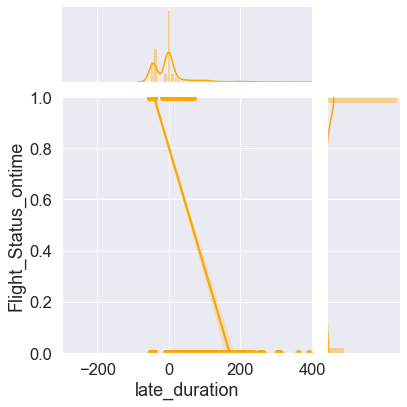

In [13]:
sns.set(font_scale =1.5)
sns.jointplot(data = fd, x='late_duration', y='Flight_Status_ontime', height = 6, ratio = 3,kind = 'reg', color = 'orange', xlim = (-300, 400), ylim = (0, 1))
plt.show()

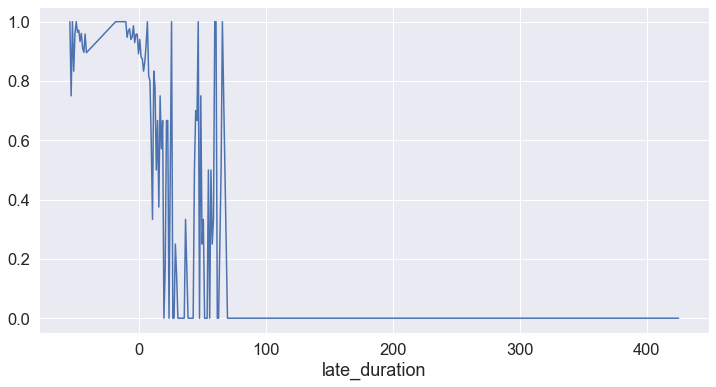

In [14]:
fd.groupby('late_duration').Flight_Status_ontime.mean().plot(kind = 'line', figsize = (12, 6))


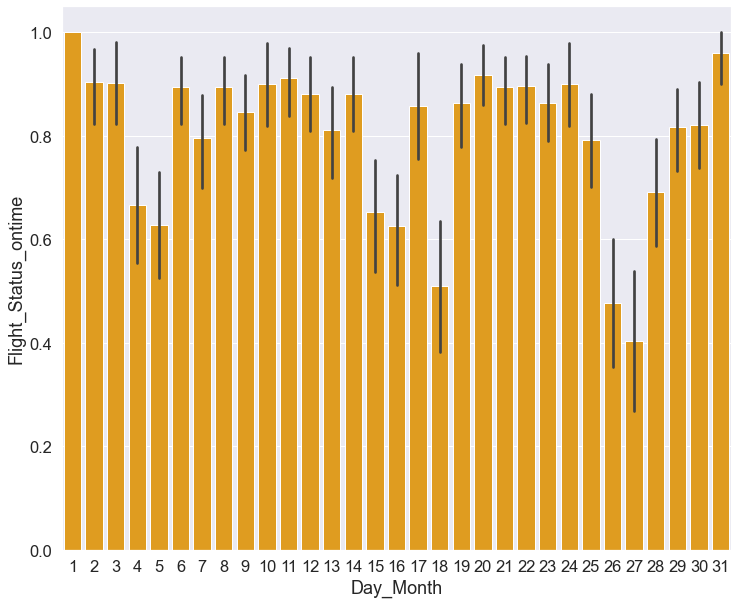

In [15]:
sns.set(font_scale = 1.5)
plt.figure(figsize = (12, 10))
sns.barplot(data = fd, x = 'Day_Month', y = 'Flight_Status_ontime',  color = 'orange')



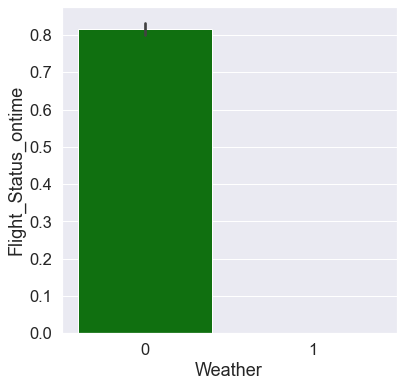

In [16]:
sns.set(font_scale = 1.5)
plt.figure(figsize = (6, 6))
sns.barplot(data = fd, x = 'Weather', y = 'Flight_Status_ontime',  color = 'green')

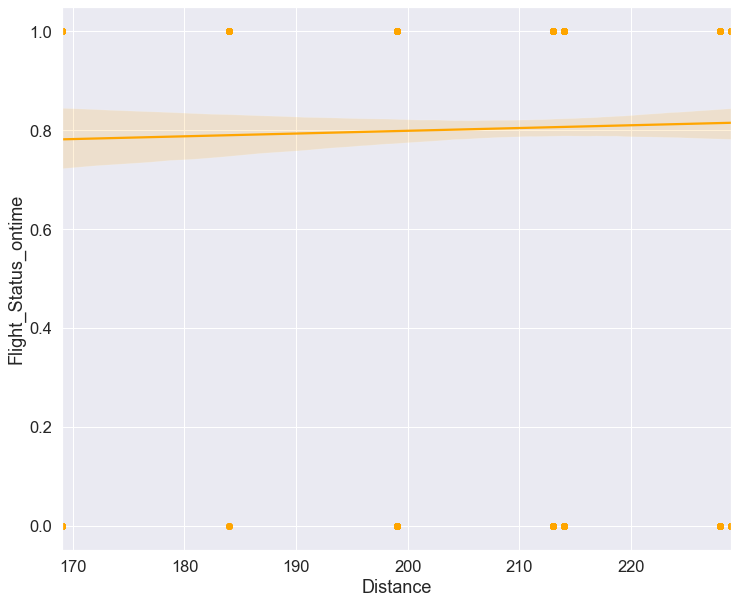

In [17]:
sns.set(font_scale = 1.5)
plt.figure(figsize = (12, 10))
sns.regplot(data = fd, x = 'Distance', y = 'Flight_Status_ontime',  color = 'orange')

In [18]:
fd.Carrier.value_counts()

DH    551
RU    408
US    404
DL    388
MQ    295
CO     94
UA     31
OH     30
Name: Carrier, dtype: int64

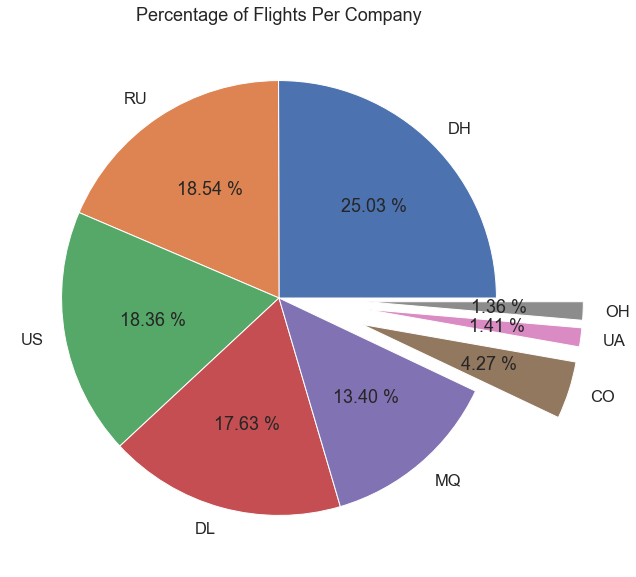

In [19]:
number = [551, 408, 404, 388, 295, 94, 31, 30]
labels = ['DH', 'RU', 'US', 'DL', 'MQ', 'CO', 'UA', 'OH']
plt.figure(figsize = (10,10))
plt.title('Percentage of Flights Per Company')
plt.pie(number, labels = labels,  autopct = '% .2f %%', explode = (0, 0, 0, 0, 0, .4,.4,.4))
plt.show()

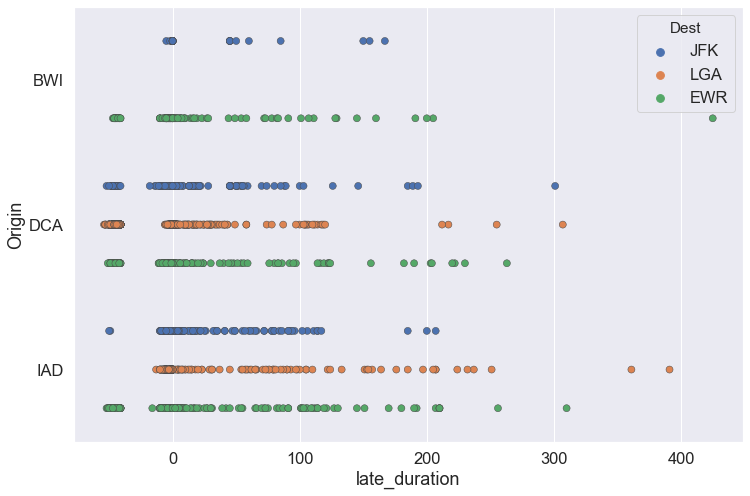

In [20]:
plt.figure(figsize = ( 12, 8))
sns.stripplot(data = fd, y = 'Origin', x = 'late_duration', jitter = False, hue = 'Dest', dodge = True, size = 7, linewidth=.5)


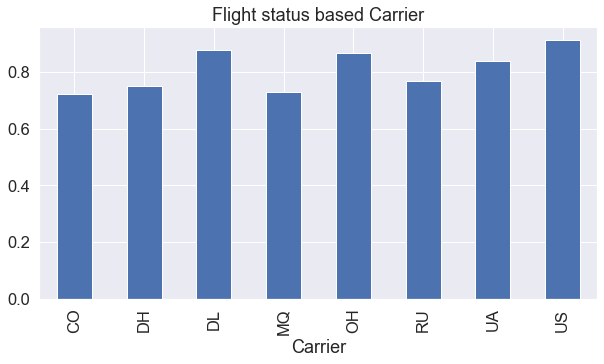

In [21]:
fd.groupby('Carrier').Flight_Status_ontime.mean().plot(kind = 'bar', figsize = (10, 5), title = 'Flight status based Carrier')



In [22]:
fd['Flight_Date'] = pd.to_datetime(fd['Flight_Date'])

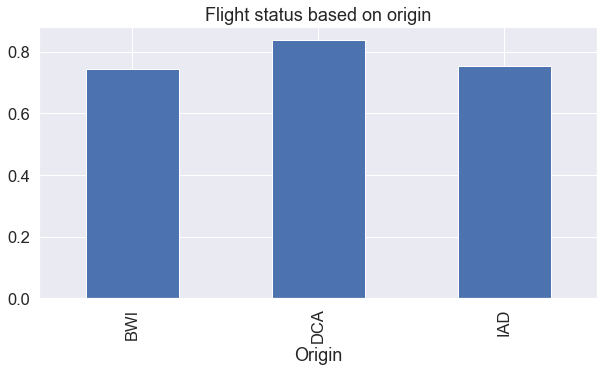

In [23]:
fd.groupby('Origin').Flight_Status_ontime.mean().plot(kind = 'bar', figsize = (10, 5), title = 'Flight status based on origin')

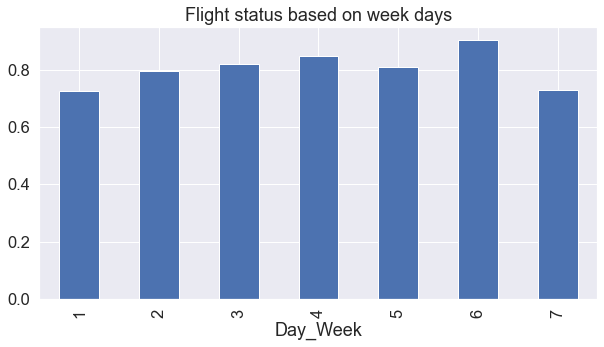

In [24]:
fd.groupby('Day_Week').Flight_Status_ontime.mean().plot(kind = 'bar', figsize = (10, 5), title = 'Flight status based on week days')


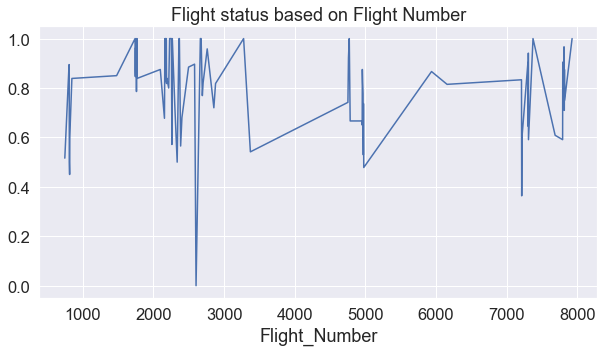

In [25]:
fd.Flight_Number.astype('category')
fd.groupby('Flight_Number').Flight_Status_ontime.mean().plot(kind = 'line', figsize = (10, 5), title = 'Flight status based on Flight Number')




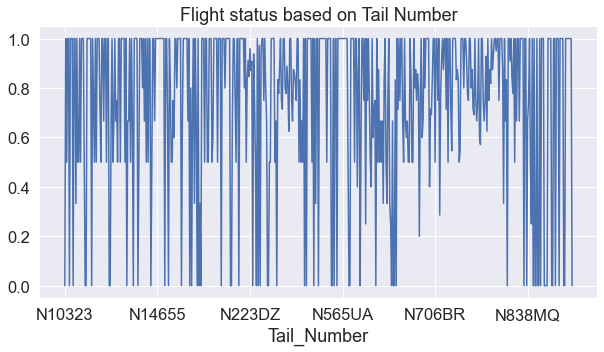

In [26]:
fd.groupby('Tail_Number').Flight_Status_ontime.mean().plot(kind = 'line', figsize = (10, 5),title = 'Flight status based on Tail Number')

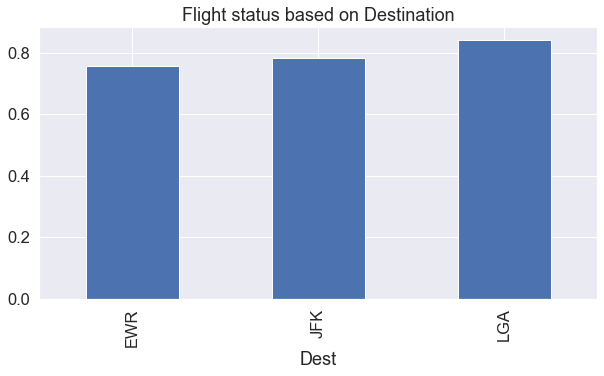

In [27]:
fd.groupby('Dest').Flight_Status_ontime.mean().plot(kind = 'bar', figsize = (10, 5),title = 'Flight status based on Destination')

Text(0, 0.5, 'frequency')

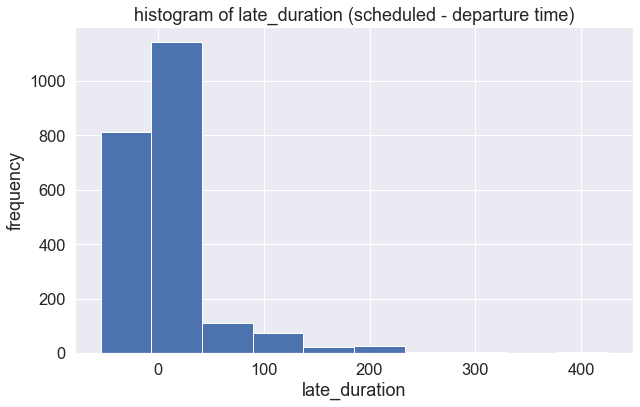

In [28]:
h = fd.late_duration.plot(figsize = (10, 6), kind = 'hist', title = 'histogram of late_duration (scheduled - departure time)')
h.set_xlabel('late_duration')
h.set_ylabel('frequency')


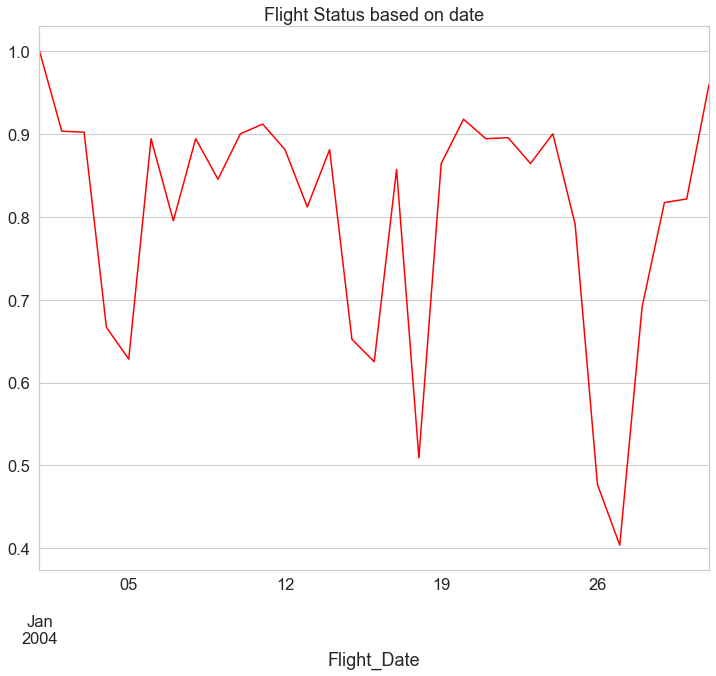

In [29]:
sns.set_style("whitegrid", {"xtick.major.size": 8, "ytick.major.size": 8})
fd.groupby('Flight_Date').Flight_Status_ontime.mean().plot(figsize = (12, 10), title = 'Flight Status based on date', color = 'red')

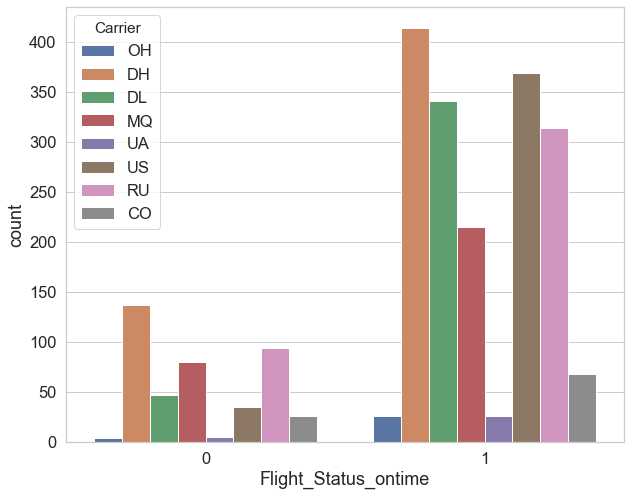

In [30]:
plt.figure(figsize = (10, 8))
sns.countplot(data = fd, x = 'Flight_Status_ontime', hue = 'Carrier')

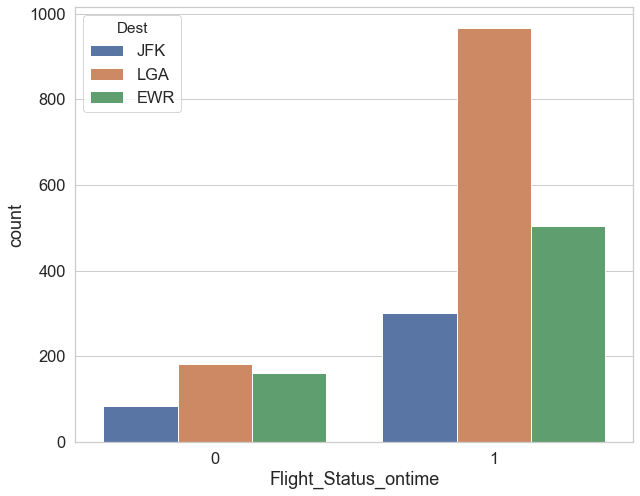

In [31]:
plt.figure(figsize = (10, 8))
sns.countplot(data = fd, x = 'Flight_Status_ontime', hue = 'Dest')

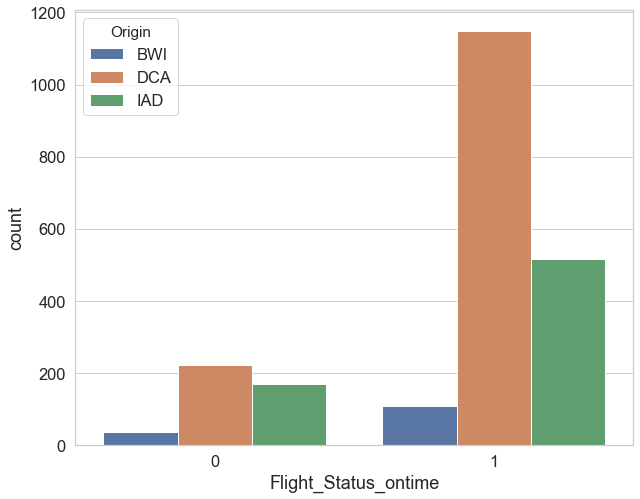

In [32]:
plt.figure(figsize = (10, 8))
sns.countplot(data = fd, x = 'Flight_Status_ontime', hue = 'Origin')

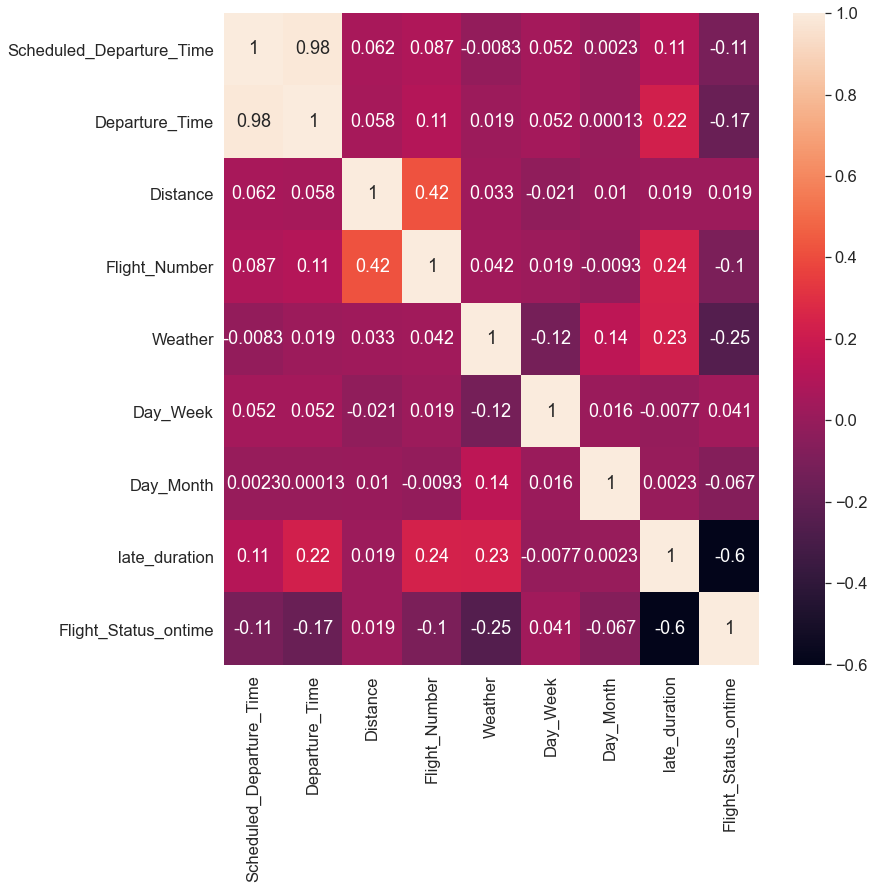

In [33]:
plt.figure(figsize = (12, 12))
sns.heatmap(fd.corr(), annot = True)

In [34]:
fd.head()

,Scheduled_Departure_Time,Carrier,Departure_Time,Dest,Distance,Flight_Date,Flight_Number,Origin,Weather,Day_Week,Day_Month,Tail_Number,late_duration,Flight_Status_ontime
0,1455,OH,1455,JFK,184,2004-01-01,5935,BWI,0,4,1,N940CA,0,1
1,1640,DH,1640,JFK,213,2004-01-01,6155,DCA,0,4,1,N405FJ,0,1
2,1245,DH,1245,LGA,229,2004-01-01,7208,IAD,0,4,1,N695BR,0,1
3,1715,DH,1709,LGA,229,2004-01-01,7215,IAD,0,4,1,N662BR,-6,1
4,1039,DH,1035,LGA,229,2004-01-01,7792,IAD,0,4,1,N698BR,-4,1


In [35]:
Time_Bins =list(range(600, 2201, 100))

In [36]:
Scheduled_Dep_Bins = pd.cut(fd.Scheduled_Departure_Time, Time_Bins, right = False)

In [37]:
Scheduled_Dep_Bins.value_counts()

[1700, 1800)    241
[1400, 1500)    236
[1600, 1700)    178
[800, 900)      162
[1300, 1400)    157
[1500, 1600)    154
[1200, 1300)    142
[2100, 2200)    137
[700, 800)      135
[600, 700)      126
[1900, 2000)    119
[900, 1000)     108
[1000, 1100)    100
[1800, 1900)     85
[1100, 1200)     68
[2000, 2100)     53
Name: Scheduled_Departure_Time, dtype: int64

In [38]:
fd['Scheduled_Dep_Bins'] = Scheduled_Dep_Bins

In [39]:
fd.head()

,Scheduled_Departure_Time,Carrier,Departure_Time,Dest,Distance,Flight_Date,Flight_Number,Origin,Weather,Day_Week,Day_Month,Tail_Number,late_duration,Flight_Status_ontime,Scheduled_Dep_Bins
0,1455,OH,1455,JFK,184,2004-01-01,5935,BWI,0,4,1,N940CA,0,1,"[1400, 1500)"
1,1640,DH,1640,JFK,213,2004-01-01,6155,DCA,0,4,1,N405FJ,0,1,"[1600, 1700)"
2,1245,DH,1245,LGA,229,2004-01-01,7208,IAD,0,4,1,N695BR,0,1,"[1200, 1300)"
3,1715,DH,1709,LGA,229,2004-01-01,7215,IAD,0,4,1,N662BR,-6,1,"[1700, 1800)"
4,1039,DH,1035,LGA,229,2004-01-01,7792,IAD,0,4,1,N698BR,-4,1,"[1000, 1100)"


In [40]:
Dep_Bins = pd.cut(fd.Departure_Time, Time_Bins, right = False)

In [41]:
fd['Dep_Bins'] = Dep_Bins

In [42]:
fd.head()

,Scheduled_Departure_Time,Carrier,Departure_Time,Dest,Distance,Flight_Date,Flight_Number,Origin,Weather,Day_Week,Day_Month,Tail_Number,late_duration,Flight_Status_ontime,Scheduled_Dep_Bins,Dep_Bins
0,1455,OH,1455,JFK,184,2004-01-01,5935,BWI,0,4,1,N940CA,0,1,"[1400, 1500)","[1400, 1500)"
1,1640,DH,1640,JFK,213,2004-01-01,6155,DCA,0,4,1,N405FJ,0,1,"[1600, 1700)","[1600, 1700)"
2,1245,DH,1245,LGA,229,2004-01-01,7208,IAD,0,4,1,N695BR,0,1,"[1200, 1300)","[1200, 1300)"
3,1715,DH,1709,LGA,229,2004-01-01,7215,IAD,0,4,1,N662BR,-6,1,"[1700, 1800)","[1700, 1800)"
4,1039,DH,1035,LGA,229,2004-01-01,7792,IAD,0,4,1,N698BR,-4,1,"[1000, 1100)","[1000, 1100)"


In [43]:
dd= fd.groupby([ 'Origin', 'Dest', 'Weather', 'Departure_Time', 'Day_Week', 'Day_Month']).Flight_Status_ontime.max()
dd

Origin  Dest  Weather  Departure_Time  Day_Week  Day_Month
BWI     EWR   0        653             2         13           1
                       654             1         19           1
                                       5         16           1
                                                 23           1
                                       6         24           0
                                                             ..
IAD     LGA   1        929             1         26           0
                       1026            2         27           0
                       1409            2         27           0
                       1520            2         27           0
                       1735            2         27           0
Name: Flight_Status_ontime, Length: 2180, dtype: uint8

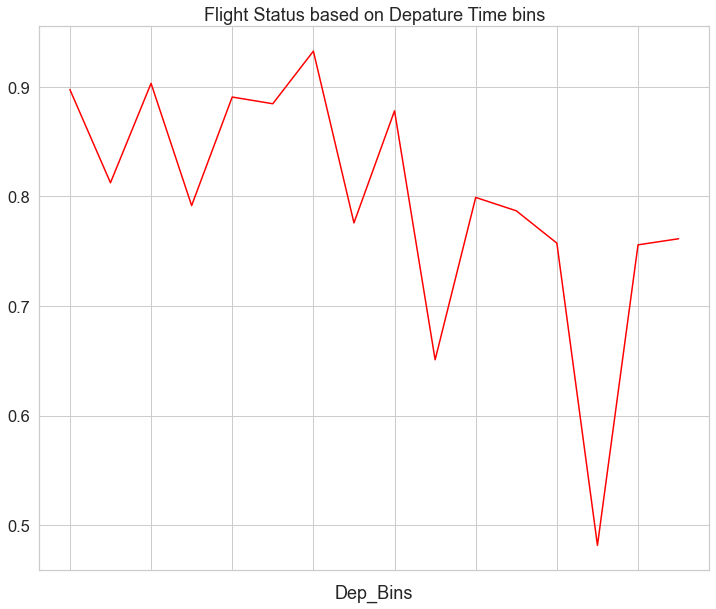

In [44]:
fd.groupby('Dep_Bins').Flight_Status_ontime.mean().plot(figsize = (12, 10), title = 'Flight Status based on Depature Time bins', color = 'red')

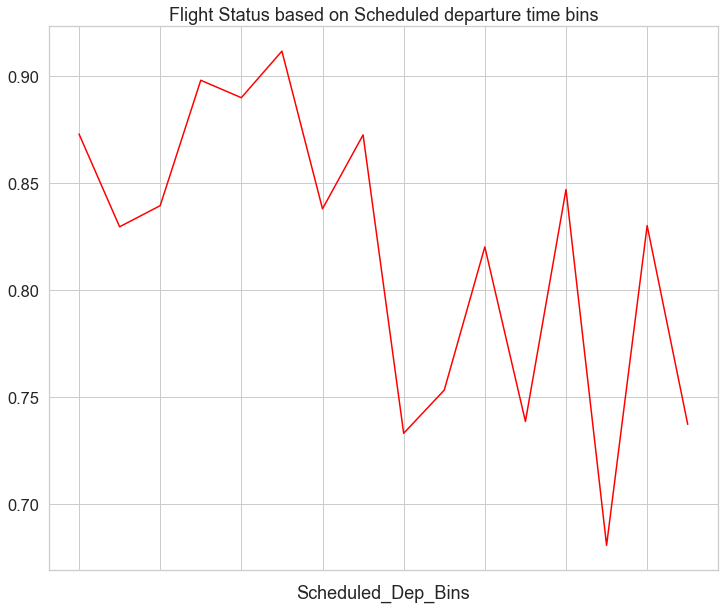

In [45]:
fd.groupby('Scheduled_Dep_Bins').Flight_Status_ontime.mean().plot(figsize = (12, 10), title = 'Flight Status based on Scheduled departure time bins', color = 'red')

In [46]:
fd_with_dummies = pd.get_dummies(fd, columns = ['Scheduled_Dep_Bins','Dep_Bins', 'Carrier', 'Dest', 'Flight_Number', 'Origin', 'Weather', 'Day_Week', 'Day_Month', 'Tail_Number'], drop_first = True)

In [47]:
fd_with_dummies.head()

,Scheduled_Departure_Time,Departure_Time,Distance,Flight_Date,late_duration,Flight_Status_ontime,"Scheduled_Dep_Bins_[700, 800)","Scheduled_Dep_Bins_[800, 900)","Scheduled_Dep_Bins_[900, 1000)","Scheduled_Dep_Bins_[1000, 1100)",...,Tail_Number_N970DL,Tail_Number_N973CA,Tail_Number_N974DL,Tail_Number_N975CA,Tail_Number_N983CA,Tail_Number_N986DL,Tail_Number_N987DL,Tail_Number_N994DL,Tail_Number_N995CA,Tail_Number_N997DL
0,1455,1455,184,2004-01-01,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1640,1640,213,2004-01-01,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1245,1245,229,2004-01-01,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1715,1709,229,2004-01-01,-6,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1039,1035,229,2004-01-01,-4,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [48]:
fd_with_dummies.drop(['Scheduled_Departure_Time', 'Departure_Time', 'Flight_Date'], axis = 1, inplace = True)

In [49]:
fd_with_dummies.head()

,Distance,late_duration,Flight_Status_ontime,"Scheduled_Dep_Bins_[700, 800)","Scheduled_Dep_Bins_[800, 900)","Scheduled_Dep_Bins_[900, 1000)","Scheduled_Dep_Bins_[1000, 1100)","Scheduled_Dep_Bins_[1100, 1200)","Scheduled_Dep_Bins_[1200, 1300)","Scheduled_Dep_Bins_[1300, 1400)",...,Tail_Number_N970DL,Tail_Number_N973CA,Tail_Number_N974DL,Tail_Number_N975CA,Tail_Number_N983CA,Tail_Number_N986DL,Tail_Number_N987DL,Tail_Number_N994DL,Tail_Number_N995CA,Tail_Number_N997DL
0,184,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,213,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,229,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,229,-6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,229,-4,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
X = fd_with_dummies.drop(['Flight_Status_ontime'], axis = 1)

In [51]:
X.head()


,Distance,late_duration,"Scheduled_Dep_Bins_[700, 800)","Scheduled_Dep_Bins_[800, 900)","Scheduled_Dep_Bins_[900, 1000)","Scheduled_Dep_Bins_[1000, 1100)","Scheduled_Dep_Bins_[1100, 1200)","Scheduled_Dep_Bins_[1200, 1300)","Scheduled_Dep_Bins_[1300, 1400)","Scheduled_Dep_Bins_[1400, 1500)",...,Tail_Number_N970DL,Tail_Number_N973CA,Tail_Number_N974DL,Tail_Number_N975CA,Tail_Number_N983CA,Tail_Number_N986DL,Tail_Number_N987DL,Tail_Number_N994DL,Tail_Number_N995CA,Tail_Number_N997DL
0,184,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,213,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,229,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,229,-6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,229,-4,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
X.shape

(2201, 730)

In [53]:
y = fd_with_dummies['Flight_Status_ontime']

In [54]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Flight_Status_ontime, dtype: uint8

In [55]:
y.values.reshape(-1,1)
y.to_frame()

,Flight_Status_ontime
0,1
1,1
2,1
3,1
4,1
...,...
2196,1
2197,1
2198,1
2199,1


In [56]:
y.shape

(2201,)

In [57]:
dis = (X.Distance - X.Distance.mean())/X.Distance.std()

In [58]:
X['Distance'] = dis

In [59]:
#X.head()

In [60]:
X['late_duration'] = (X.late_duration - X.late_duration.mean())/X.late_duration.std()

In [61]:
X.head()

,Distance,late_duration,"Scheduled_Dep_Bins_[700, 800)","Scheduled_Dep_Bins_[800, 900)","Scheduled_Dep_Bins_[900, 1000)","Scheduled_Dep_Bins_[1000, 1100)","Scheduled_Dep_Bins_[1100, 1200)","Scheduled_Dep_Bins_[1200, 1300)","Scheduled_Dep_Bins_[1300, 1400)","Scheduled_Dep_Bins_[1400, 1500)",...,Tail_Number_N970DL,Tail_Number_N973CA,Tail_Number_N974DL,Tail_Number_N975CA,Tail_Number_N983CA,Tail_Number_N986DL,Tail_Number_N987DL,Tail_Number_N994DL,Tail_Number_N995CA,Tail_Number_N997DL
0,-2.092950,0.015199,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.084748,0.015199,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.286237,0.015199,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.286237,-0.103642,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.286237,-0.064028,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
fd_with_dummies.isnull().sum()
len(X)
print(X.columns)

Index(['Distance', 'late_duration', 'Scheduled_Dep_Bins_[700, 800)',
       'Scheduled_Dep_Bins_[800, 900)', 'Scheduled_Dep_Bins_[900, 1000)',
       'Scheduled_Dep_Bins_[1000, 1100)', 'Scheduled_Dep_Bins_[1100, 1200)',
       'Scheduled_Dep_Bins_[1200, 1300)', 'Scheduled_Dep_Bins_[1300, 1400)',
       'Scheduled_Dep_Bins_[1400, 1500)',
       ...
       'Tail_Number_N970DL', 'Tail_Number_N973CA', 'Tail_Number_N974DL',
       'Tail_Number_N975CA', 'Tail_Number_N983CA', 'Tail_Number_N986DL',
       'Tail_Number_N987DL', 'Tail_Number_N994DL', 'Tail_Number_N995CA',
       'Tail_Number_N997DL'],
      dtype='object', length=730)


In [63]:
X_train = X[:int(0.6 * len(X))].values

In [64]:
X_train.shape

(1320, 730)

In [65]:
X_test = X[int(0.6 * len(X)):].values

In [66]:
X_test.shape

(881, 730)

In [67]:
y_train = y[:int(0.6 * len(y))].values

In [68]:
y_test = y[int(0.6 * len(y)):].values

In [69]:
y_test

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [70]:
y_train.shape

(1320,)

In [71]:
y_train.shape

(1320,)

In [72]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X_log):
        intercept = np.ones((X_log.shape[0], 1))
        return np.concatenate((intercept, X_log), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y_log):
        return (-y_log * np.log(h) - (1 - y_log) * np.log(1 - h)).mean()
    
    def fit(self, X_log, y_log):
        if self.fit_intercept:
            X_log = self.__add_intercept(X_log)
        
        # weights initialization
        self.theta = np.zeros(X_log.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X_log, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X_log.T, (h - y_log)) / y_log.size
            self.theta -= self.lr * gradient
            
            if (self.verbose == True and i % 10000 == 0):
                z = np.dot(X_log, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y_log)} \t')
    
    def predict_prob(self, X_log):
        if self.fit_intercept:
            X_log = self.__add_intercept(X_log)
    
        return self.__sigmoid(np.dot(X_log, self.theta))
    
    def predict(self, X_log, threshold):
        
        return self.predict_prob(X_log) >= threshold

In [73]:
model = LogisticRegression(lr=0.1, num_iter=5000)
model.fit(X_train, y_train)

In [74]:
preds = model.predict(X_train, 0.5)

In [75]:
pred_train = preds.reshape(-1, 1)
pred_train = pred_train.astype('int')

In [76]:
pred_train.shape

(1320, 1)

In [77]:
print('model parameters',model.theta)

model parameters [ 9.15611436e-01 -1.85934246e-01 -2.95024282e+00 -3.82400469e-01
  3.88299697e-01  1.90594605e-01  3.77641176e-01  6.68690318e-02
  7.60371223e-01 -3.15061331e-02  4.61109219e-01 -7.96436735e-03
 -6.36914692e-02 -3.69477647e-02  2.51739346e-01 -4.10369490e-01
 -3.91935924e-01 -1.93266665e-01  1.68245293e-01  1.76167616e-01
  7.22442808e-01 -4.60267133e-02  4.24144961e-01  2.20286958e-01
  2.46269868e-01  9.21788520e-02  2.40329307e-01  7.46209772e-02
  4.04809700e-01 -1.76816119e-01 -6.17341540e-01 -1.43106146e-01
  3.23260336e-01  8.55251164e-01  7.49079518e-01 -7.72324765e-01
  5.04905105e-01  1.49826248e-01  3.06000714e-01 -4.89199693e-01
  3.86217776e-01  2.45007170e-01  5.02759426e-01 -3.17381912e-02
  3.76433113e-02 -6.30195588e-01 -2.97556924e-01  3.06000714e-01
  1.29431794e-01  2.81904736e-01 -1.58285720e-01 -8.18122650e-03
  1.81174000e-01  5.71025048e-02 -3.21789145e-02 -7.35956921e-02
  3.17455399e-01  3.47343876e-01  4.22791243e-03  1.23159141e-01
  3.3271

In [112]:
print(f'min and max value of the coefficients {min(model.theta)} and {max(model.theta)}')

min and max value of the coefficients -2.9502428176408237 and 1.001087013144926


In [78]:

preds = model.predict(X_test, 0.5)
pred_test = preds.reshape(-1, 1)
pred_test = pred_test.astype('int')



In [79]:
from sklearn import metrics
print('Train Accuracy Score: ',metrics.accuracy_score(y_train, pred_train))
print('Test Accuracy Score: ',metrics.accuracy_score(y_test, pred_test))
print('Test Precision Score: ',metrics.precision_score(y_test, pred_test))
print('Test Recall Score: ',metrics.recall_score(y_test, pred_test))
print('Test f1 Score: ',metrics.f1_score(y_test, pred_test))




Train Accuracy Score:  0.9295454545454546
Test Accuracy Score:  0.8864926220204313
Test Precision Score:  0.8893178893178894
Test Recall Score:  0.9801418439716312
Test f1 Score:  0.932523616734143


In [80]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)

In [81]:
print('Confusion Matrix: \n ',cm)

Confusion Matrix: 
  [[ 90  86]
 [ 14 691]]


In [82]:
X

,Distance,late_duration,"Scheduled_Dep_Bins_[700, 800)","Scheduled_Dep_Bins_[800, 900)","Scheduled_Dep_Bins_[900, 1000)","Scheduled_Dep_Bins_[1000, 1100)","Scheduled_Dep_Bins_[1100, 1200)","Scheduled_Dep_Bins_[1200, 1300)","Scheduled_Dep_Bins_[1300, 1400)","Scheduled_Dep_Bins_[1400, 1500)",...,Tail_Number_N970DL,Tail_Number_N973CA,Tail_Number_N974DL,Tail_Number_N975CA,Tail_Number_N983CA,Tail_Number_N986DL,Tail_Number_N987DL,Tail_Number_N994DL,Tail_Number_N995CA,Tail_Number_N997DL
0,-2.092950,0.015199,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.084748,0.015199,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.286237,0.015199,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.286237,-0.103642,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.286237,-0.064028,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,-0.966554,-0.004608,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2197,0.084748,-0.915728,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2198,-0.966554,-0.816693,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2199,-0.966554,0.886706,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
list(X.columns)#'Flight_Number_806' 'Flight_Number_7924'  'Tail_Number_N10575' 'Tail_Number_N997DL'

['Distance',
 'late_duration',
 'Scheduled_Dep_Bins_[700, 800)',
 'Scheduled_Dep_Bins_[800, 900)',
 'Scheduled_Dep_Bins_[900, 1000)',
 'Scheduled_Dep_Bins_[1000, 1100)',
 'Scheduled_Dep_Bins_[1100, 1200)',
 'Scheduled_Dep_Bins_[1200, 1300)',
 'Scheduled_Dep_Bins_[1300, 1400)',
 'Scheduled_Dep_Bins_[1400, 1500)',
 'Scheduled_Dep_Bins_[1500, 1600)',
 'Scheduled_Dep_Bins_[1600, 1700)',
 'Scheduled_Dep_Bins_[1700, 1800)',
 'Scheduled_Dep_Bins_[1800, 1900)',
 'Scheduled_Dep_Bins_[1900, 2000)',
 'Scheduled_Dep_Bins_[2000, 2100)',
 'Scheduled_Dep_Bins_[2100, 2200)',
 'Dep_Bins_[700, 800)',
 'Dep_Bins_[800, 900)',
 'Dep_Bins_[900, 1000)',
 'Dep_Bins_[1000, 1100)',
 'Dep_Bins_[1100, 1200)',
 'Dep_Bins_[1200, 1300)',
 'Dep_Bins_[1300, 1400)',
 'Dep_Bins_[1400, 1500)',
 'Dep_Bins_[1500, 1600)',
 'Dep_Bins_[1600, 1700)',
 'Dep_Bins_[1700, 1800)',
 'Dep_Bins_[1800, 1900)',
 'Dep_Bins_[1900, 2000)',
 'Dep_Bins_[2000, 2100)',
 'Dep_Bins_[2100, 2200)',
 'Carrier_DH',
 'Carrier_DL',
 'Carrier_MQ',
 'Ca

In [84]:
X_first_mod = X.drop(X.loc[:, 'Flight_Number_806':'Flight_Number_7924'].columns, axis = 1) #drop flight number

In [85]:
X_second_mod = X_first_mod.drop(X_first_mod.loc[:, 'Tail_Number_N10575':'Tail_Number_N997DL'].columns, axis = 1) #drop tail number

In [86]:
X_second_mod.head() #no tail nmbr and flight nmbr
X_second_mod.shape

(2201, 80)

In [87]:
list(X_second_mod.columns)

['Distance',
 'late_duration',
 'Scheduled_Dep_Bins_[700, 800)',
 'Scheduled_Dep_Bins_[800, 900)',
 'Scheduled_Dep_Bins_[900, 1000)',
 'Scheduled_Dep_Bins_[1000, 1100)',
 'Scheduled_Dep_Bins_[1100, 1200)',
 'Scheduled_Dep_Bins_[1200, 1300)',
 'Scheduled_Dep_Bins_[1300, 1400)',
 'Scheduled_Dep_Bins_[1400, 1500)',
 'Scheduled_Dep_Bins_[1500, 1600)',
 'Scheduled_Dep_Bins_[1600, 1700)',
 'Scheduled_Dep_Bins_[1700, 1800)',
 'Scheduled_Dep_Bins_[1800, 1900)',
 'Scheduled_Dep_Bins_[1900, 2000)',
 'Scheduled_Dep_Bins_[2000, 2100)',
 'Scheduled_Dep_Bins_[2100, 2200)',
 'Dep_Bins_[700, 800)',
 'Dep_Bins_[800, 900)',
 'Dep_Bins_[900, 1000)',
 'Dep_Bins_[1000, 1100)',
 'Dep_Bins_[1100, 1200)',
 'Dep_Bins_[1200, 1300)',
 'Dep_Bins_[1300, 1400)',
 'Dep_Bins_[1400, 1500)',
 'Dep_Bins_[1500, 1600)',
 'Dep_Bins_[1600, 1700)',
 'Dep_Bins_[1700, 1800)',
 'Dep_Bins_[1800, 1900)',
 'Dep_Bins_[1900, 2000)',
 'Dep_Bins_[2000, 2100)',
 'Dep_Bins_[2100, 2200)',
 'Carrier_DH',
 'Carrier_DL',
 'Carrier_MQ',
 'Ca

In [88]:
X_train_second_mod = X_second_mod[:int(0.6 * len(X))].values
X_test_second_mod = X_second_mod[int(0.6 * len(X)):].values

In [111]:
model_second_mod = LogisticRegression(lr=0.1, num_iter=10000)
model_second_mod.fit(X_train_second_mod, y_train)
print('model parameters',list(model_second_mod.theta))
print(f'min and max value of the coefficients {min(model_second_mod.theta)} and {max(model_second_mod.theta)}')
preds_second_mod_train = model_second_mod.predict(X_train_second_mod, 0.5)
preds_second_mod_test = model_second_mod.predict(X_test_second_mod, 0.5)
preds_second_mod_train = preds_second_mod_train.reshape(-1, 1)
preds_second_mod_train = preds_second_mod_train.astype('int')
preds_second_mod_test = preds_second_mod_test.reshape(-1, 1)
preds_second_mod_test = preds_second_mod_test.astype('int')


model parameters [0.9165807558750525, -0.1556790894445381, -3.087950685018282, -0.6724142103671141, 0.5072571717178854, 0.11626681446968536, 0.5954969349155802, -0.03330241592982915, 1.1841060955196365, -0.17475594047400209, 0.6684026844962211, 0.04344423373879388, -0.1883927313374692, -0.28365697495993725, 0.5688448564623336, -0.39902692794902783, -0.6114843874635227, -0.4390682063887176, 0.44194191830501484, 0.15022778870028738, 1.1812584482980724, -0.1886487376792097, 0.6482365909970987, 0.03104544830603458, 0.410114183970945, -0.03769317402235064, 0.3220912155740532, 0.1947164255609873, 0.6111962659289849, -0.3019459578301459, -0.6446110816485053, -0.05028518462923151, 0.5238866877085633, 0.9391476112380366, 0.8027649269561725, -0.9652791886339392, 0.99396587029538, 0.17086201686414187, 0.5775754607200018, -0.7317186909151433, 0.40165285326801403, 0.29988318735042097, 0.42684715089893543, 0.2497828170027325, -0.2046045828407403, 0.1586631781202606, 0.010356044540449846, 0.653907000

In [90]:
print('Train Accuracy Score: ',metrics.accuracy_score(y_train, preds_second_mod_train))
print('Test Accuracy Score: ',metrics.accuracy_score(y_test, preds_second_mod_test))
print('Test Precision Score: ',metrics.precision_score(y_test, preds_second_mod_test))
print('Test Recall Score: ',metrics.recall_score(y_test,preds_second_mod_test))
print('Test f1 Score: ',metrics.f1_score(y_test, preds_second_mod_test))


Train Accuracy Score:  0.918939393939394
Test Accuracy Score:  0.8944381384790011
Test Precision Score:  0.8893129770992366
Test Recall Score:  0.9914893617021276
Test f1 Score:  0.9376257545271629


In [91]:
X_third_mod = X_second_mod.drop(X_second_mod.loc[:, 'Scheduled_Dep_Bins_[700, 800)':'Scheduled_Dep_Bins_[2100, 2200)'].columns, axis = 1)
X_third_mod = X_third_mod.drop(['Distance'],axis = 1)#removed distance
print(X_third_mod.columns)

Index(['late_duration', 'Dep_Bins_[700, 800)', 'Dep_Bins_[800, 900)',
       'Dep_Bins_[900, 1000)', 'Dep_Bins_[1000, 1100)',
       'Dep_Bins_[1100, 1200)', 'Dep_Bins_[1200, 1300)',
       'Dep_Bins_[1300, 1400)', 'Dep_Bins_[1400, 1500)',
       'Dep_Bins_[1500, 1600)', 'Dep_Bins_[1600, 1700)',
       'Dep_Bins_[1700, 1800)', 'Dep_Bins_[1800, 1900)',
       'Dep_Bins_[1900, 2000)', 'Dep_Bins_[2000, 2100)',
       'Dep_Bins_[2100, 2200)', 'Carrier_DH', 'Carrier_DL', 'Carrier_MQ',
       'Carrier_OH', 'Carrier_RU', 'Carrier_UA', 'Carrier_US', 'Dest_JFK',
       'Dest_LGA', 'Origin_DCA', 'Origin_IAD', 'Weather_1', 'Day_Week_2',
       'Day_Week_3', 'Day_Week_4', 'Day_Week_5', 'Day_Week_6', 'Day_Week_7',
       'Day_Month_2', 'Day_Month_3', 'Day_Month_4', 'Day_Month_5',
       'Day_Month_6', 'Day_Month_7', 'Day_Month_8', 'Day_Month_9',
       'Day_Month_10', 'Day_Month_11', 'Day_Month_12', 'Day_Month_13',
       'Day_Month_14', 'Day_Month_15', 'Day_Month_16', 'Day_Month_17',
       'Day_M

In [92]:
X_third_mod.head() #scheduled departure bins removed because they have high correlation with departure bins

,late_duration,"Dep_Bins_[700, 800)","Dep_Bins_[800, 900)","Dep_Bins_[900, 1000)","Dep_Bins_[1000, 1100)","Dep_Bins_[1100, 1200)","Dep_Bins_[1200, 1300)","Dep_Bins_[1300, 1400)","Dep_Bins_[1400, 1500)","Dep_Bins_[1500, 1600)",...,Day_Month_22,Day_Month_23,Day_Month_24,Day_Month_25,Day_Month_26,Day_Month_27,Day_Month_28,Day_Month_29,Day_Month_30,Day_Month_31
0,0.015199,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.015199,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.015199,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.103642,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.064028,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
X_third_mod.shape

(2201, 64)

In [94]:
X_train_third_mod = X_third_mod[:int(0.6 * len(X))].values
X_test_third_mod = X_third_mod[int(0.6 * len(X)):].values

In [110]:
model_third_mod = LogisticRegression(lr=0.1, num_iter=20000)
model_third_mod.fit(X_train_third_mod, y_train)
print('model parameters',model_third_mod.theta)
print(f'min and max value of the coefficients {min(model_third_mod.theta)} and {max(model_third_mod.theta)}')
preds_third_mod_train = model_third_mod.predict(X_train_third_mod, 0.5)
preds_third_mod_test = model_third_mod.predict(X_test_third_mod, 0.5)
preds_third_mod_train = preds_third_mod_train.reshape(-1, 1)
preds_third_mod_train = preds_third_mod_train.astype('int')
preds_third_mod_test = preds_third_mod_test.reshape(-1, 1)
preds_third_mod_test = preds_third_mod_test.astype('int')


model parameters [ 1.17031031 -2.87948851  0.18134676  0.66464525  1.65681127  0.33879896
  1.02522829  0.74379235  0.80896205  0.5154631   0.61057985  0.06748005
  0.49902147  0.12282076 -0.9364451  -0.41763907  0.18406364  1.28268333
  0.91540176 -0.97370226  1.74002839  0.26496198  0.96098889 -0.6726701
  0.31043125  0.16596443  0.09812769 -0.40353511 -0.29751633  0.13829731
  0.01255486  0.99611687  0.14937923  0.14476939 -0.20963017  0.86066669
  0.58855872  0.19104684 -0.22661033  0.40300707 -0.08763061 -0.41757061
  0.14519202  0.04443661  1.07135368 -0.16260982 -0.26470976  0.10018547
 -1.54999015 -0.85647948 -0.48822595 -1.47203068  0.32804297  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]
min and max value of the coefficients -2.8794885092361864 and 1.7400283858978283


In [96]:
print('Train Accuracy Score: ',metrics.accuracy_score(y_train, preds_third_mod_train))
print('Test Accuracy Score: ',metrics.accuracy_score(y_test, preds_third_mod_test))
print('Test Precision Score: ',metrics.precision_score(y_test, preds_third_mod_test))
print('Test Recall Score: ',metrics.recall_score(y_test,preds_third_mod_test))
print('Test f1 Score: ',metrics.f1_score(y_test, preds_third_mod_test))


Train Accuracy Score:  0.9174242424242425
Test Accuracy Score:  0.8887627695800226
Test Precision Score:  0.8856416772554002
Test Recall Score:  0.9886524822695035
Test f1 Score:  0.9343163538873993


In [97]:





print(f'Getting a minor better test accuracy while keeping both Scheduled departure bins and departure bins by {float(metrics.accuracy_score(y_test, preds_second_mod_test) - metrics.accuracy_score(y_test, preds_third_mod_test))*100/metrics.accuracy_score(y_test, preds_second_mod_test)} percentage by these two features are highly correllated creating the problem of multicollinearity therefore remoning the Scheduled Departure time bins is better option which also decreases the number of features being categorical')
      
      
      

Getting a minor better test accuracy while keeping both Scheduled departure bins and departure bins by 0.634517766497465 percentage by these two features are highly correllated creating the problem of multicollinearity therefore remoning the Scheduled Departure time bins is better option which also decreases the number of features being categorical


In [98]:
print('Therefore final model is with features: late_duration, Departure_Bins, Carrier, Destinaiton, Origin, Day_Week, Day_Month', model_third_mod.theta)

Therefore final model is with features: late_duration, Departure_Bins, Carrier, Destinaiton, Origin, Day_Week, Day_Month [ 1.17031031 -2.87948851  0.18134676  0.66464525  1.65681127  0.33879896
  1.02522829  0.74379235  0.80896205  0.5154631   0.61057985  0.06748005
  0.49902147  0.12282076 -0.9364451  -0.41763907  0.18406364  1.28268333
  0.91540176 -0.97370226  1.74002839  0.26496198  0.96098889 -0.6726701
  0.31043125  0.16596443  0.09812769 -0.40353511 -0.29751633  0.13829731
  0.01255486  0.99611687  0.14937923  0.14476939 -0.20963017  0.86066669
  0.58855872  0.19104684 -0.22661033  0.40300707 -0.08763061 -0.41757061
  0.14519202  0.04443661  1.07135368 -0.16260982 -0.26470976  0.10018547
 -1.54999015 -0.85647948 -0.48822595 -1.47203068  0.32804297  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


In [99]:
print('Accuracies:')
print('-----------------------------------------------------------------')
print('Train Accuracy Score: ',metrics.accuracy_score(y_train, preds_third_mod_train))
print('Test Accuracy Score: ',metrics.accuracy_score(y_test, preds_third_mod_test))
print('Test Precision Score: ',metrics.precision_score(y_test, preds_third_mod_test))
print('Test Recall Score: ',metrics.recall_score(y_test,preds_third_mod_test))
print('Test f1 Score: ',metrics.f1_score(y_test, preds_third_mod_test))


Accuracies:
-----------------------------------------------------------------
Train Accuracy Score:  0.9174242424242425
Test Accuracy Score:  0.8887627695800226
Test Precision Score:  0.8856416772554002
Test Recall Score:  0.9886524822695035
Test f1 Score:  0.9343163538873993


In [100]:
fd.head()

,Scheduled_Departure_Time,Carrier,Departure_Time,Dest,Distance,Flight_Date,Flight_Number,Origin,Weather,Day_Week,Day_Month,Tail_Number,late_duration,Flight_Status_ontime,Scheduled_Dep_Bins,Dep_Bins
0,1455,OH,1455,JFK,184,2004-01-01,5935,BWI,0,4,1,N940CA,0,1,"[1400, 1500)","[1400, 1500)"
1,1640,DH,1640,JFK,213,2004-01-01,6155,DCA,0,4,1,N405FJ,0,1,"[1600, 1700)","[1600, 1700)"
2,1245,DH,1245,LGA,229,2004-01-01,7208,IAD,0,4,1,N695BR,0,1,"[1200, 1300)","[1200, 1300)"
3,1715,DH,1709,LGA,229,2004-01-01,7215,IAD,0,4,1,N662BR,-6,1,"[1700, 1800)","[1700, 1800)"
4,1039,DH,1035,LGA,229,2004-01-01,7792,IAD,0,4,1,N698BR,-4,1,"[1000, 1100)","[1000, 1100)"


In [101]:
fd1 = fd.loc[(fd.Origin == 'DCA')]

In [102]:
fd12 = fd1.loc[fd.Dest == 'EWR']

In [103]:
fd123 = fd12.loc[fd.Flight_Status_ontime == 1]

In [104]:
Weather = fd123.Weather.value_counts().index[0]


In [105]:
departure_time =fd123.Departure_Time.value_counts().index[0]


In [106]:
Carrier = fd123.Carrier.value_counts().index[0]


In [107]:
month_day = fd123.Day_Month.value_counts().index[0]


In [108]:
week_day = fd123.Day_Week.value_counts().index[0]


In [109]:
print(f'Suitable weather, departure time, carrier, month day and week day for the highest chance of ontime flight from DC to Newyork: {Weather}, {departure_time}, {Carrier}, {month_day}, {week_day}')

Suitable weather, departure time, carrier, month day and week day for the highest chance of ontime flight from DC to Newyork: 0, 1356, RU, 2, 5
